In [1]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
import pandas as pd
from scipy.ndimage import center_of_mass
import skimage as skifrom scipy import ndimage

In [13]:
(images, _), (_, _) = mnist.load_data()

# SVD
# svd = TruncatedSVD(n_components=(28*28) - 1)
# X_svd = svd.fit_transform(images)

center_of_masses = []
for i in (1, 10000):
    center_of_masses.append(ndimage.measurements.center_of_mass(images[i-1:i,]))
print(center_of_masses)

[(0.0, 14.035785649409627, 13.64519527702089), (0.0, 14.384708678988988, 13.975355358269054)]
2


/var/folders/kk/rrn70w0j58l3gj1_ggmbkg5h0000gn/T/ipykernel_48972/1852625419.py:9: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  center_of_masses.append(ndimage.measurements.center_of_mass(images[i-1:i,]))


In [4]:
# center of mass
center_of_mass = np.array([center_of_mass(img) for img in images])
print(center_of_mass.shape)

(60000, 2)


In [5]:
# image center (14, 14)
center_of_images = np.full((60000, 2), [14, 14])
print(center_of_images.shape)

(60000, 2)


In [6]:
# translation vector
b = center_of_images - center_of_mass
print(b.shape)

(60000, 2)


In [7]:
translated_images = np.concatenate((flattened, b), axis=1)

# SVD
svd_translated = TruncatedSVD(n_components=(28*28) - 1)
X_translated_svd = svd_translated.fit_transform(translated_images)

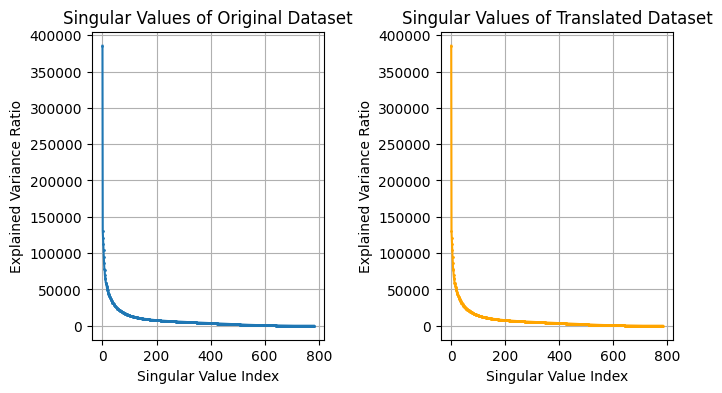

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(svd.singular_values_, marker='o', markersize=1)
plt.title("Singular Values of Original Dataset")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)

plt.subplot(132)
plt.plot(svd_translated.singular_values_, marker='o', color='orange', markersize=1)
plt.title("Singular Values of Translated Dataset")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)

plt.subplots_adjust(wspace=0.5)
plt.show()